<a href="https://colab.research.google.com/github/shakshi3105/data-preprocessing-and-cleaning/blob/main/predictivemodel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [400]:
#importing important libraries
import numpy as np
import matplotlib.pyplot as plt
import math
import pandas as pd
import seaborn as sns
import scipy as sp
import statsmodels as sm

In [401]:
#Loading the dataset
df=pd.read_csv("/content/DATA - 3.csv")

In [402]:
#To understand data we have to know no. of rows and columns
df.shape
print("No. of rows :",df.shape[0])
print("No. of columns :",df.shape[1])

No. of rows : 49664
No. of columns : 13


In [403]:
#Reading the dataset

In [404]:
df.head(3)

,participantID,age,nativeLanguage,gender,education,city,country,responseID,section,cue,R1,R2,R3
0,12,28,URU_R,Fe,4.0,Montevideo,Uruguay,128.0,set_2013,bar,abierto,cerveza,noche
1,12,28,URU_R,Fe,4.0,Montevideo,Uruguay,129.0,set_2013,tren,expreso,nocturno,bala
2,12,28,URU_R,Fe,4.0,Montevideo,Uruguay,130.0,set_2013,mano,libre,derecha,hermano


In [405]:
df.tail(3)

,participantID,age,nativeLanguage,gender,education,city,country,responseID,section,cue,R1,R2,R3
49661,3675,30,URU_R,Fe,5.0,Montevideo,Uruguay,49854.0,set_2013,pierna,pelos,caminar,No más respuestas
49662,3675,30,URU_R,Fe,5.0,Montevideo,Uruguay,49855.0,set_2013,dejar,ir,relación,fracasar
49663,3675,30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [406]:
#let's check the datatype for the following
type(df)

pandas.core.frame.DataFrame

In [407]:
#To understand the data we must know the information

In [408]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49664 entries, 0 to 49663
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   participantID   49664 non-null  int64  
 1   age             49664 non-null  int64  
 2   nativeLanguage  48889 non-null  object 
 3   gender          49663 non-null  object 
 4   education       49663 non-null  float64
 5   city            33805 non-null  object 
 6   country         49663 non-null  object 
 7   responseID      49663 non-null  float64
 8   section         49663 non-null  object 
 9   cue             49663 non-null  object 
 10  R1              49638 non-null  object 
 11  R2              49646 non-null  object 
 12  R3              49648 non-null  object 
dtypes: float64(2), int64(2), object(9)
memory usage: 4.9+ MB


In [409]:
df.describe()

,participantID,age,education,responseID
count,49664.000000,49664.000000,49663.000000,49663.000000
mean,1820.426869,34.248993,3.935908,26321.206149
std,1065.833654,13.550942,0.650601,17473.904006
min,12.000000,5.000000,1.000000,128.000000
25%,911.000000,25.000000,4.000000,12798.500000
50%,1786.000000,30.000000,4.000000,25380.000000
75%,2831.000000,41.000000,4.000000,38012.500000
max,3675.000000,99.000000,5.000000,103302.000000


In [410]:
#let's check whether their is any null value or not
df.isnull().values.any()

True

In [411]:
#if yes we must know how many null values are there so.....
df.isnull().sum()

participantID         0
age                   0
nativeLanguage      775
gender                1
education             1
city              15859
country               1
responseID            1
section               1
cue                   1
R1                   26
R2                   18
R3                   16
dtype: int64

In [412]:
#nunique tells us the no. of unique values in each columns
df.nunique()

participantID      2760
age                  71
nativeLanguage        4
gender                2
education             5
city                120
country              29
responseID        49663
section               1
cue                 999
R1                 9904
R2                10918
R3                10879
dtype: int64

In [413]:
#let's know the unique value in each column

In [ ]:
df.nativeLanguage.unique()

array(['URU_R', 'ARG_C', nan, 'ARG_R', 'ARG_N', 'U'], dtype=object)

In [414]:
df.gender.unique()

array(['Fe', 'Ma', nan], dtype=object)

In [415]:
df.city.unique()

array(['Montevideo', nan, 'Cachan', 'Paris', 'Mendoza', 'notfound',
       'Buenos Aires', 'Cambridge', 'Santiago', 'Bures-sur-yvette',
       'Moza', 'Mezel', 'La Paz', 'Federal', 'Lascano', 'Bridgewater',
       'Los Cerrillos', 'Pforzheim', 'Maipú', 'Tallahassee',
       'Las Piedras', 'Bayona', 'Minas', 'Tucumán', 'Drummoyne',
       'Tel Aviv', 'Huancavelica', 'Palermo', 'La Habana', 'Ames',
       'Mountain View', 'Moreno', 'Rochester', 'Vigo', 'Munro', 'Rosario',
       'Ituzaingó', 'New York', 'Dietmannsried', 'Berlin',
       'Pietermaritzburg', 'Ripollet', 'Córdoba', 'Opera', 'Partille',
       'Rio De Janeiro', 'Carrasco', 'Málaga', 'Aguas Corrientes',
       'Lanús', 'Montreal', 'São Paulo', 'Jujuy', 'Requena', 'Washington',
       'Salem', 'Gadsden', 'Bronx', 'Sevilla', 'Tel Mond',
       'Santa Coloma De Cervelló', 'Pilar', 'Montalieu', 'Paterna',
       'Philadelphia', 'Barcelona', 'Toronto', 'Niterói', 'Auckland',
       'East Rockaway', 'Valladolid', 'Madrid', 'Lima', 

In [416]:
df.responseID.unique()

array([  128.,   129.,   130., ..., 49854., 49855.,    nan])

In [417]:
df.R1.unique()

array(['abierto', 'expreso', 'libre', ..., 'célebre', 'jueza', 'de auto'],
      dtype=object)

In [418]:
df.R2.unique()

array(['cerveza', 'nocturno', 'derecha', ..., 'descender', 'pasarlo',
       'levadizo'], dtype=object)

In [419]:
df.R3.unique()

array(['noche', 'bala', 'hermano', ..., 'sándwich', 'otra vez',
       'vilariño'], dtype=object)

In [420]:
df.education.unique()

array([ 4.,  1.,  5.,  3.,  2., nan])

In [421]:
df.cue.unique()

array(['bar', 'tren', 'mano', 'sopa', 'especie', 'mina', 'asco', 'gana',
       'venta', 'iglesia', 'cantar', 'papa', 'muerte', 'mercado',
       'pescado', 'mientras', 'puto', 'allá', 'gigante', 'medicina',
       'listo', 'gracia', 'llave', 'compromiso', 'menor', 'ejemplo',
       'juego', 'desastre', 'raza', 'demasiado', 'felicidad', 'temporada',
       'uniforme', 'caso', 'hermano', 'teatro', 'escenario', 'cada',
       'llegado', 'hablar', 'madre', 'marca', 'comercial', 'contenta',
       'banda', 'vista', 'paciente', 'mamá', 'tribunal', 'carne',
       'abierta', 'entrar', 'coincidencia', 'abra', 'amor', 'comienzo',
       'virgen', 'golpe', 'jueves', 'quizá', 'transporte', 'niño',
       'banco', 'sentido', 'guapo', 'fiebre', 'social', 'esposa', 'buen',
       'maestra', 'enfermedad', 'sangre', 'episodio', 'nadie', 'whisky',
       'tres', 'espada', 'tiro', 'lunes', 'primo', 'ahora', 'bosque',
       'criatura', 'premio', 'alcohol', 'serie', 'día', 'enemigo',
       'querido', '

In [422]:
#Let's convert categorical data into numerical data

In [423]:
df.nativeLanguage.value_counts()

URU_R    46747
ARG_R     1782
ARG_C      306
ARG_N       54
Name: nativeLanguage, dtype: int64

In [424]:
df['nativeLanguage_numeric']=pd.factorize(df.nativeLanguage)[0]

In [425]:
df

,participantID,age,nativeLanguage,gender,education,city,country,responseID,section,cue,R1,R2,R3,nativeLanguage_numeric
0,12,28,URU_R,Fe,4.0,Montevideo,Uruguay,128.0,set_2013,bar,abierto,cerveza,noche,0
1,12,28,URU_R,Fe,4.0,Montevideo,Uruguay,129.0,set_2013,tren,expreso,nocturno,bala,0
2,12,28,URU_R,Fe,4.0,Montevideo,Uruguay,130.0,set_2013,mano,libre,derecha,hermano,0
3,12,28,URU_R,Fe,4.0,Montevideo,Uruguay,131.0,set_2013,sopa,fría,Mafalda,verde,0
4,12,28,URU_R,Fe,4.0,Montevideo,Uruguay,132.0,set_2013,especie,ave,Darwin,extinción,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49659,3673,30,URU_R,Fe,5.0,NaN,Uruguay,49852.0,set_2013,raza,negra,humana,perro,0
49660,3675,30,URU_R,Fe,5.0,Montevideo,Uruguay,49853.0,set_2013,cita,hora,romántica,No más respuestas,0
49661,3675,30,URU_R,Fe,5.0,Montevideo,Uruguay,49854.0,set_2013,pierna,pelos,caminar,No más respuestas,0
49662,3675,30,URU_R,Fe,5.0,Montevideo,Uruguay,49855.0,set_2013,dejar,ir,relación,fracasar,0


In [427]:
df['city_numeric']=pd.factorize(df.city)[0]
df['gender_numeric']=pd.factorize(df.gender)[0]
df['cue_numeric']=pd.factorize(df.cue)[0]
df['R1_numeric']=pd.factorize(df.R1)[0]
df['R2_numeric']=pd.factorize(df.R2)[0]
df['R3_numeric']=pd.factorize(df.R3)[0]
df['country_numeric']=pd.factorize(df.country)[0]
df['section_numeric']=pd.factorize(df.section)[0]

In [428]:
df

,participantID,age,nativeLanguage,gender,education,city,country,responseID,section,cue,...,R3,nativeLanguage_numeric,city_numeric,gender_numeric,cue_numeric,R1_numeric,R2_numeric,R3_numeric,country_numeric,section_numeric
0,12,28,URU_R,Fe,4.0,Montevideo,Uruguay,128.0,set_2013,bar,...,noche,0,0,0,0,0,0,0,0,0
1,12,28,URU_R,Fe,4.0,Montevideo,Uruguay,129.0,set_2013,tren,...,bala,0,0,0,1,1,1,1,0,0
2,12,28,URU_R,Fe,4.0,Montevideo,Uruguay,130.0,set_2013,mano,...,hermano,0,0,0,2,2,2,2,0,0
3,12,28,URU_R,Fe,4.0,Montevideo,Uruguay,131.0,set_2013,sopa,...,verde,0,0,0,3,3,3,3,0,0
4,12,28,URU_R,Fe,4.0,Montevideo,Uruguay,132.0,set_2013,especie,...,extinción,0,0,0,4,4,4,4,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49659,3673,30,URU_R,Fe,5.0,NaN,Uruguay,49852.0,set_2013,raza,...,perro,0,-1,0,28,625,2106,485,0,0
49660,3675,30,URU_R,Fe,5.0,Montevideo,Uruguay,49853.0,set_2013,cita,...,No más respuestas,0,0,0,507,71,1960,12,0,0
49661,3675,30,URU_R,Fe,5.0,Montevideo,Uruguay,49854.0,set_2013,pierna,...,No más respuestas,0,0,0,282,4953,293,12,0,0
49662,3675,30,URU_R,Fe,5.0,Montevideo,Uruguay,49855.0,set_2013,dejar,...,fracasar,0,0,0,256,421,1073,3392,0,0


In [429]:
#As we can see number of columns have been increased
df.shape
print("No. of rows :",df.shape[0])
print("No. of columns :",df.shape[1])

No. of rows : 49664
No. of columns : 22


In [430]:
#How to change allign the same data
df['age']=df.pop('age')

In [431]:
df

,participantID,nativeLanguage,gender,education,city,country,responseID,section,cue,R1,...,nativeLanguage_numeric,city_numeric,gender_numeric,cue_numeric,R1_numeric,R2_numeric,R3_numeric,country_numeric,section_numeric,age
0,12,URU_R,Fe,4.0,Montevideo,Uruguay,128.0,set_2013,bar,abierto,...,0,0,0,0,0,0,0,0,0,28
1,12,URU_R,Fe,4.0,Montevideo,Uruguay,129.0,set_2013,tren,expreso,...,0,0,0,1,1,1,1,0,0,28
2,12,URU_R,Fe,4.0,Montevideo,Uruguay,130.0,set_2013,mano,libre,...,0,0,0,2,2,2,2,0,0,28
3,12,URU_R,Fe,4.0,Montevideo,Uruguay,131.0,set_2013,sopa,fría,...,0,0,0,3,3,3,3,0,0,28
4,12,URU_R,Fe,4.0,Montevideo,Uruguay,132.0,set_2013,especie,ave,...,0,0,0,4,4,4,4,0,0,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49659,3673,URU_R,Fe,5.0,NaN,Uruguay,49852.0,set_2013,raza,negra,...,0,-1,0,28,625,2106,485,0,0,30
49660,3675,URU_R,Fe,5.0,Montevideo,Uruguay,49853.0,set_2013,cita,hora,...,0,0,0,507,71,1960,12,0,0,30
49661,3675,URU_R,Fe,5.0,Montevideo,Uruguay,49854.0,set_2013,pierna,pelos,...,0,0,0,282,4953,293,12,0,0,30
49662,3675,URU_R,Fe,5.0,Montevideo,Uruguay,49855.0,set_2013,dejar,ir,...,0,0,0,256,421,1073,3392,0,0,30


In [432]:
columns_to_drop = ['nativeLanguage', 'city','R1','R2','R3','cue','gender','section','country']
df.drop(columns=columns_to_drop, inplace=True,axis=1)


In [433]:
df

,participantID,education,responseID,nativeLanguage_numeric,city_numeric,gender_numeric,cue_numeric,R1_numeric,R2_numeric,R3_numeric,country_numeric,section_numeric,age
0,12,4.0,128.0,0,0,0,0,0,0,0,0,0,28
1,12,4.0,129.0,0,0,0,1,1,1,1,0,0,28
2,12,4.0,130.0,0,0,0,2,2,2,2,0,0,28
3,12,4.0,131.0,0,0,0,3,3,3,3,0,0,28
4,12,4.0,132.0,0,0,0,4,4,4,4,0,0,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...
49659,3673,5.0,49852.0,0,-1,0,28,625,2106,485,0,0,30
49660,3675,5.0,49853.0,0,0,0,507,71,1960,12,0,0,30
49661,3675,5.0,49854.0,0,0,0,282,4953,293,12,0,0,30
49662,3675,5.0,49855.0,0,0,0,256,421,1073,3392,0,0,30


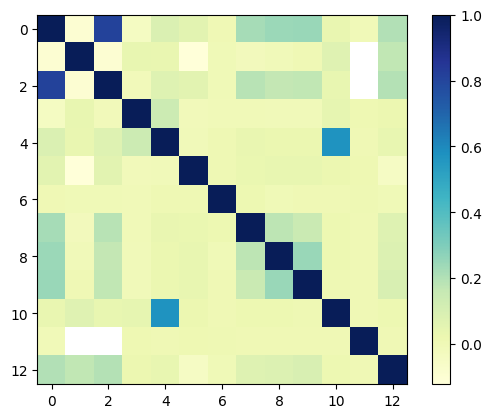

In [434]:
plt.imshow(df.corr(), cmap='YlGnBu')
plt.colorbar()
plt.show()

In [435]:
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [436]:
X=df.iloc[:,:-1]
Y=df.iloc[:,-1]


In [437]:
df=X.dropna(inplace=True)
df=X.fillna(X.mean(), inplace=True)

In [440]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.20,random_state=104,shuffle=True)

ValueError: ignored

In [441]:
X_train

,participantID,education,responseID,nativeLanguage_numeric,city_numeric,gender_numeric,cue_numeric,R1_numeric,R2_numeric,R3_numeric,country_numeric
12744,937,5,12893,-1,-1,0,520,462,49,1250,18
21639,1552,4,21791,0,4,1,967,1970,22,12,3
13837,1012,3,13986,0,-1,0,102,4530,2052,4722,0
18851,1360,4,19001,2,60,0,499,444,1675,2408,2
27407,1981,4,27560,0,0,0,736,2655,35,7488,0
...,...,...,...,...,...,...,...,...,...,...,...
9152,666,3,9282,0,-1,0,80,118,348,12,0
3843,284,4,3954,2,12,0,325,455,63,1927,2
14180,1035,4,14329,0,-1,1,933,799,416,611,0
31240,2247,4,102937,0,4,1,424,7458,8227,8068,3


In [442]:
X_test

,participantID,education,responseID,nativeLanguage_numeric,city_numeric,gender_numeric,cue_numeric,R1_numeric,R2_numeric,R3_numeric,country_numeric
30859,2218,4,30976,0,0,1,402,1480,22,12,0
17977,1303,3,18127,0,0,0,543,1160,921,1060,0
6756,485,3,6885,0,0,1,377,1561,705,638,0
33059,2376,3,33140,0,-1,1,947,1388,3863,492,0
17042,1238,4,102724,0,0,0,412,3522,22,12,0
...,...,...,...,...,...,...,...,...,...,...,...
33921,2441,4,33966,0,63,1,885,1705,276,97,7
13094,964,4,13243,0,0,1,813,3281,980,2660,0
34216,2461,5,34261,0,0,1,141,7878,1271,907,0
19548,1407,4,19699,0,0,0,513,142,22,12,0


In [443]:
Y_train

12744    0
21639    0
13837    0
18851    0
27407    0
        ..
9152     0
3843     0
14180    0
31240    0
8261     0
Name: section_numeric, Length: 26126, dtype: int64

In [444]:
Y_test

30859    0
17977    0
6756     0
33059    0
17042    0
        ..
33921    0
13094    0
34216    0
19548    0
18524    0
Name: section_numeric, Length: 11198, dtype: int64

In [445]:
df

In [ ]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,mean_absolute_percentage_error

In [446]:
ler=LinearRegression()
ler.fit(X_train,Y_train)

LinearRegression()

In [455]:
#Making predictions
pred=ler.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy_score(Y_test,pred)

1.0

In [448]:
pred

array([0., 0., 0., ..., 0., 0., 0.])

In [449]:
pred=pred.astype(int)

In [450]:
import warnings

In [451]:
warnings.filterwarnings("ignore",category=DeprecationWarning)

In [452]:
type(df)

NoneType

In [453]:
ler.score(X_train,Y_train)

1.0